In [3]:
import xarray as xr

df = xr.open_dataset(r"Data\EA_Selected_Farm_Data\f2022.c1991.p2022.t2022_cropped.nc")
print(df)

<xarray.Dataset> Size: 3MB
Dimensions:             (lat: 160, lon: 213)
Coordinates:
  * lat                 (lat) float64 1kB -27.15 -27.2 -27.25 ... -35.05 -35.1
  * lon                 (lon) float64 2kB 113.6 113.7 113.7 ... 124.2 124.2
Data variables:
    A_total_cropped_ha  (lat, lon) float64 273kB ...
    H_wheat_dot_hat     (lat, lon) float64 273kB ...
    H_barley_dot_hat    (lat, lon) float64 273kB ...
    H_sorghum_dot_hat   (lat, lon) float64 273kB ...
    H_oilseeds_dot_hat  (lat, lon) float64 273kB ...
    A_wheat_hat_ha      (lat, lon) float64 273kB ...
    A_barley_hat_ha     (lat, lon) float64 273kB ...
    A_sorghum_hat_ha    (lat, lon) float64 273kB ...
    A_oilseeds_hat_ha   (lat, lon) float64 273kB ...
    farmland_per_cell   (lat, lon) float32 136kB ...
Attributes:
    fyear:    2022
    cyear:    1991
    pyear:    2022
    tyear:    2022


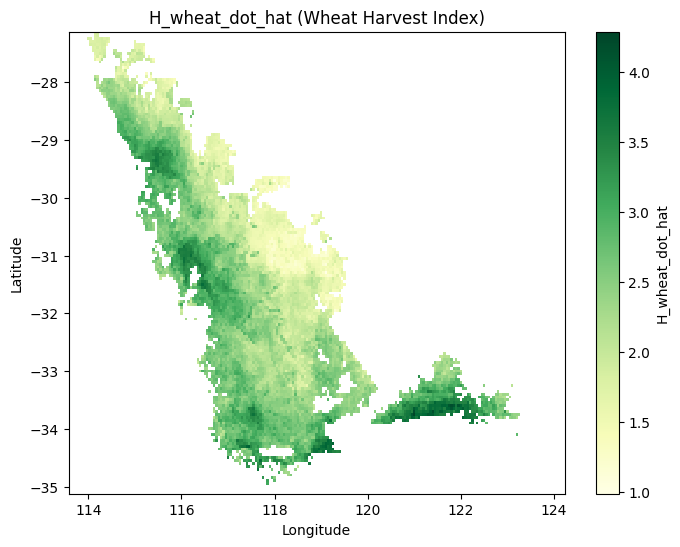

In [6]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset
ds = xr.open_dataset(r"Data\EA_Selected_Farm_Data\f2022.c1991.p2022.t2022_cropped.nc")

# Plot
ds["H_wheat_dot_hat"].plot(
    figsize=(8,6),
    cmap="YlGn"
)

plt.title("H_wheat_dot_hat (Wheat Harvest Index)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [8]:
total_grids = ds.dims["lat"] * ds.dims["lon"]

print("Total grids:", total_grids)

Total grids: 34080


C:\Users\u1171032\AppData\Local\Temp\ipykernel_24732\3390997233.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  total_grids = ds.dims["lat"] * ds.dims["lon"]


In [9]:
valid_grids = ds["H_wheat_dot_hat"].count().item()

print("Valid grids (non-NaN):", valid_grids)


Valid grids (non-NaN): 7653


In [10]:
total_rectangular = ds.dims["lat"] * ds.dims["lon"]
valid_cells = ds["H_wheat_dot_hat"].count().item()

print("Rectangular grids:", total_rectangular)
print("Inside boundary (non-NaN):", valid_cells)


Rectangular grids: 34080
Inside boundary (non-NaN): 7653


C:\Users\u1171032\AppData\Local\Temp\ipykernel_24732\2366992252.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  total_rectangular = ds.dims["lat"] * ds.dims["lon"]


In [11]:
import numpy as np

inside = ~ds["H_wheat_dot_hat"].isnull()

print("Inside boundary grids:", inside.sum().item())

print("Inside boundary but NO wheat:",
      ((inside) & (ds["H_wheat_dot_hat"] == 0)).sum().item())

print("Inside boundary WITH wheat:",
      ((inside) & (ds["H_wheat_dot_hat"] > 0)).sum().item())


Inside boundary grids: 7653
Inside boundary but NO wheat: 0
Inside boundary WITH wheat: 7653


In [12]:
inside_boundary = ~ds["A_total_cropped_ha"].isnull()

print("Inside boundary grids:", inside_boundary.sum().item())


Inside boundary grids: 8212
